In [ ]:
# 데이터 로드 및 확인
import numpy as np
import pandas as pd 

health_df = pd.read_csv('./data/gym_churn_us.csv')

# health_df.describe()

# 결측 확인
health_df.isna().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_15368\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_15368\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_15368\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Tem

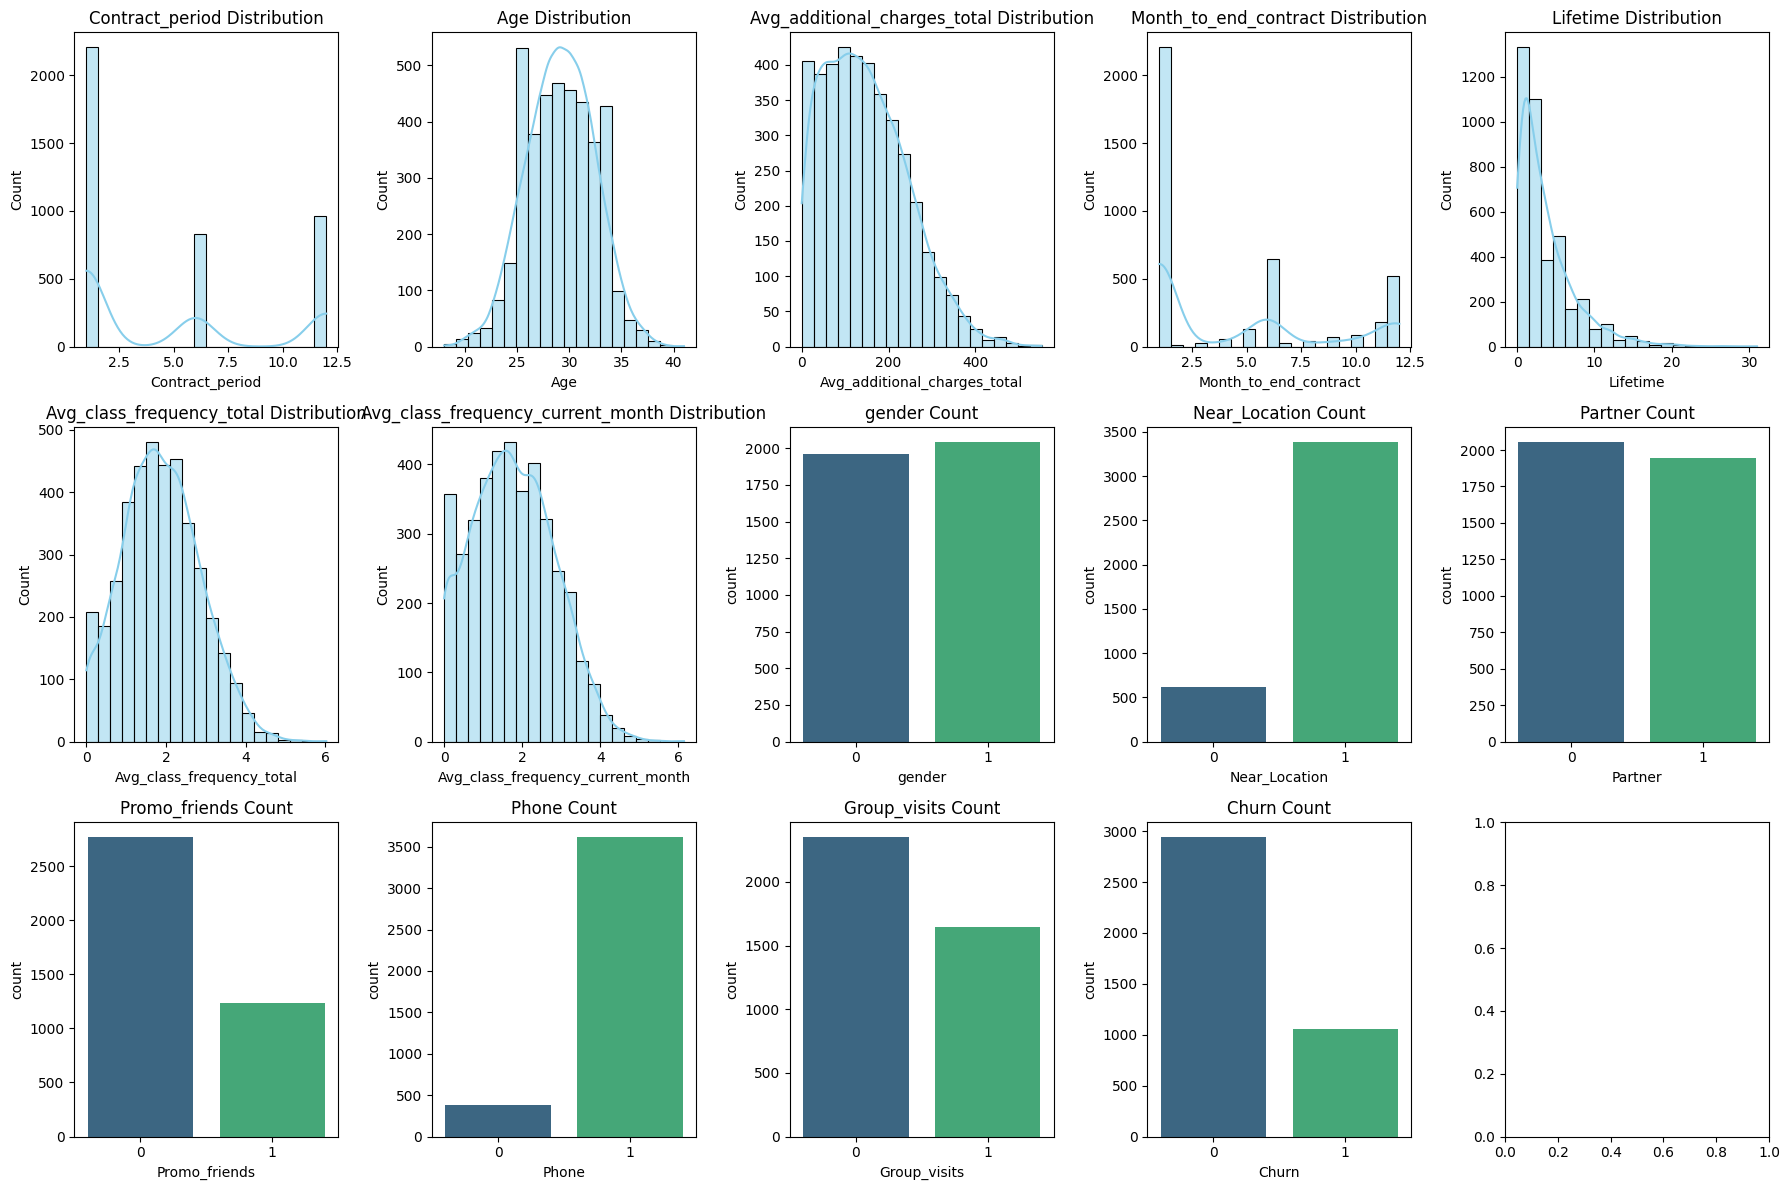

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

df = health_df

fig, axes = plt.subplots(3, 5, figsize=(18, 12))  

numeric_columns = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                   'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, color='skyblue', bins=20, ax=axes[i//5, i%5])  # 3x5 배치에 맞게 위치
    axes[i//5, i%5].set_title(f'{column} Distribution')

categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']

for i, column in enumerate(categorical_columns, len(numeric_columns)):
    sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])  
    axes[i//5, i%5].set_title(f'{column} Count')

plt.tight_layout()
plt.show()
